# Assignment 5 - Computer Applications in Physics
**Yu Jiawei (586067) Humblodt-Universität zu Berlin**

Simulation of the molecular dynamic in 1-Dimension.
In this case, there are two oxygen atoms which are 4 Ångström apart from the other.

In [35]:
import numpy
import scipy, scipy.integrate
import matplotlib.pyplot as mpl

For oxygen atom pair we have $\dfrac{\varepsilon_{i,j}}{k}=72.2K$ and $\sigma_{i,j}=3.265Å$

In [36]:
# Define some significant constants

epsk_OO = 72.2 # in (K)
sigma_OO = 3.265 # in (Å)
m_O = 16 # Mass of an oxygen atom in (u)

In [39]:
# Define the Lennard-Jones Force of two O-atoms in 1D
def F_LJ(pos_list):
    
    # Distance between two atoms
    r = abs(pos_list[1] - pos_list[0])
    
    # LJ Force as a function of distance r
    F = 4*epsk_OO/r * (12*(sigma_OO/r)**12 - 6*(sigma_OO/r)**6)
    
    # Output the forces of both atoms
    force_out = numpy.zeros(2)
    force_out[0] = -(pos_list[1] - pos_list[0])/r * F
    force_out[1] = +(pos_list[1] - pos_list[0])/r * F
    
    return force_out

In [40]:
# Define the Leapfrog integrater of two O-atoms in 1D
# REFERENCE "Python-Exercise-4June2018.ipynb"
def Leapfrog_Solver(initial_condition, 
                    time_array, 
                    boundary_condition=None, 
                    periodic_BC=None):
    
    """ The initial conditions are formulated as a (N_atom,2) array, 
    in which [N_atom,0] is x0 and [N_atom,1] is v0_x """

    
    # Some basic parameters
    dt = abs(time_array[0]-time_array[1]) # Time step
    N_t = numpy.size(time_array) # Number of time steps
    N_atom = 2 # Number of atoms
    
    # Prepare the array for outputs
    position = numpy.zeros((N_atom, N_t+1), "float64")
    velocity = numpy.zeros_like(position)
    
    # Plug in the initial conditions
    position[:,0] = initial_condition[:,0]
    velocity[:,0] = initial_condition[:,1] - dt/2 * F_LJ(position[:,0])/m_O # Velocity of t=-dt/2
    
    ## The Leapfrog Loop
    x_time = time_array
    v_time = time_array + dt/2
    
    # Update the position and velocity (NO BOUNDARY)
    for i in numpy.arange(N_t):
        position[:,i+1] = position[:,i] + dt * velocity[:,i]
        velocity[:,i+1] = velocity[:,i] + dt * F_LJ(position[:,i+1])/m_O
    
    # The final data point
    velocity[:,-1] += -dt/2 * F_LJ(position[:,-1])/m_O
    
    return position, velocity

## (a) T = 0K
Initial conditions: $x_1(0)=-2Å,x_2(0)=2Å$ and $v_1(0)=-v_2(0)=v_{rms}$

In [123]:
T = 0 # in (K)
v_rms = numpy.sqrt(T/m_O) # in (K.ps.Å^-1.u^-1) ?
t = numpy.linspace(0,20,1001) # in (ps)

# Initial conditions
N_atom = 2
IC = numpy.zeros((N_atom, 2), "float64")
IC[:,0] = [-2, 2]
IC[:,1] = [v_rms, -v_rms]

sol1 = Leapfrog_Solver(IC, time_array=t)

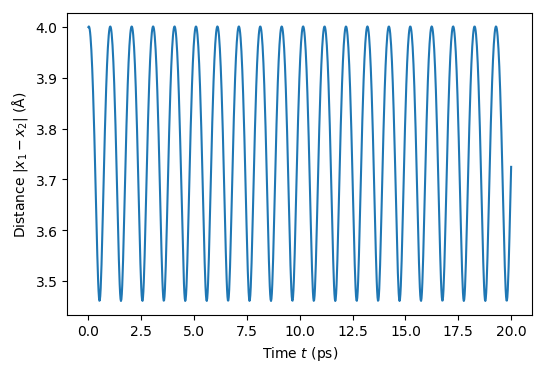

The average distance by T=0K is 3.7633192294629136 Å


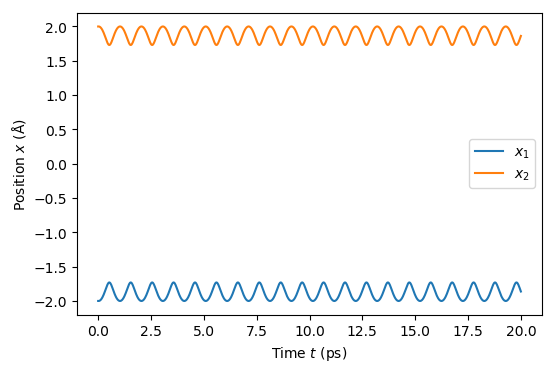

In [124]:
Graph1 = mpl.figure(dpi=100)
mpl.plot(t,abs(sol1[0][0][:-1]-sol1[0][1][:-1]))
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Distance $|x_1-x_2|$ (Å)')
mpl.show()

# The mean of the distance
d1 = abs(sol1[0][0][:-1]-sol1[0][1][:-1]).mean()
print('The average distance by T=0K is',d1,'Å')

Graph2 = mpl.figure(dpi=100)
mpl.plot(t,sol1[0][0][:-1],label='$x_1$')
mpl.plot(t,sol1[0][1][:-1],label='$x_2$')
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Position $x$ (Å)')
mpl.legend(loc='best')
mpl.show()

## (b) T=50K
Initial conditions: $x_1(0)=-2Å,x_2(0)=2Å$ and $v_1(0)=-v_2(0)=v_{rms}$

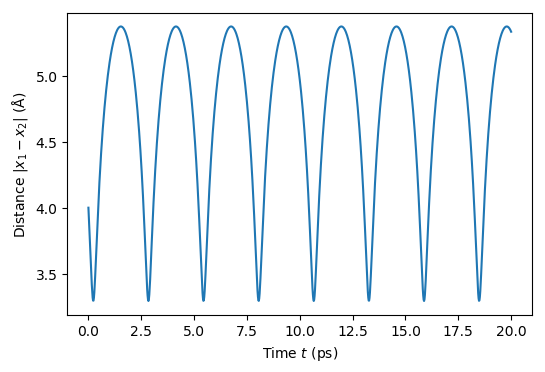

The average distance by T=50K is 4.718247964701601 Å


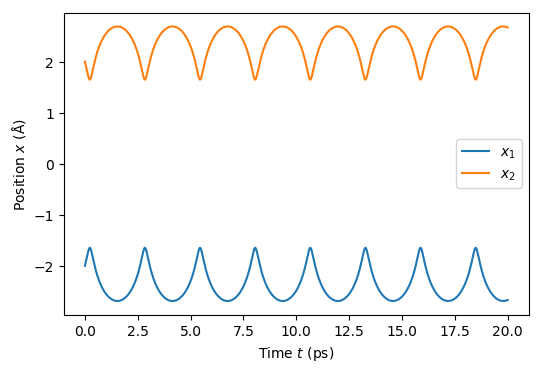

In [125]:
T = 50 # in (K)
v_rms = numpy.sqrt(T/m_O) # in (K.ps.Å^-1.u^-1) ?
t = numpy.linspace(0,20,1001) # in (ps)

# Initial conditions
N_atom = 2
IC = numpy.zeros((N_atom, 2), "float64")
IC[:,0] = [-2, 2]
IC[:,1] = [v_rms, -v_rms]

sol2 = Leapfrog_Solver(IC, time_array=t)

Graph3 = mpl.figure(dpi=100)
mpl.plot(t,abs(sol2[0][0][:-1]-sol2[0][1][:-1]))
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Distance $|x_1-x_2|$ (Å)')
mpl.show()

# The mean of the distance
d2 = abs(sol2[0][0][:-1]-sol2[0][1][:-1]).mean()
print('The average distance by T=50K is',d2,'Å')

Graph4 = mpl.figure(dpi=100)
mpl.plot(t,sol2[0][0][:-1],label='$x_1$')
mpl.plot(t,sol2[0][1][:-1],label='$x_2$')
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Position $x$ (Å)')
mpl.legend(loc='best')
mpl.show()

## (c) T=100K
Initial conditions: $x_1(0)=-2Å,x_2(0)=2Å$ and $v_1(0)=-v_2(0)=v_{rms}$

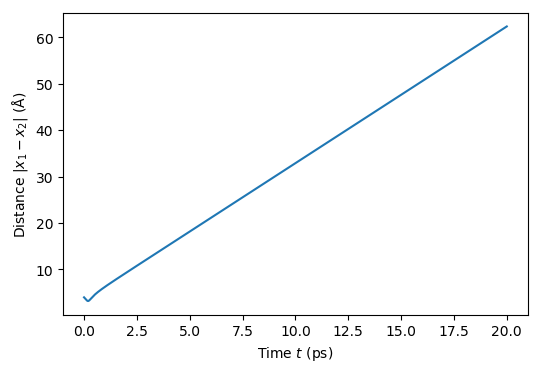

The average distance by T=100K is 32.87812788235385 Å


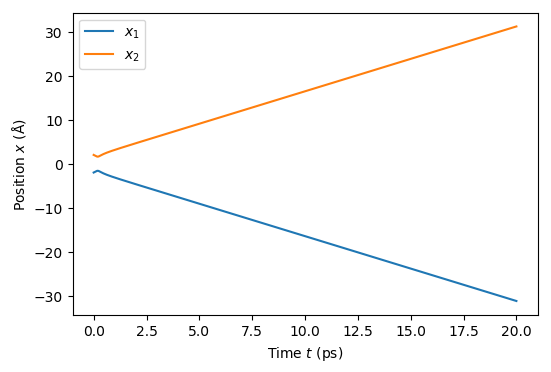

In [126]:
T = 100 # in (K)
v_rms = numpy.sqrt(T/m_O) # in (K.ps.Å^-1.u^-1) ?
t = numpy.linspace(0,20,1001) # in (ps)

# Initial conditions
N_atom = 2
IC = numpy.zeros((N_atom, 2), "float64")
IC[:,0] = [-2, 2]
IC[:,1] = [v_rms, -v_rms]

sol3 = Leapfrog_Solver(IC, time_array=t)

Graph5 = mpl.figure(dpi=100)
mpl.plot(t,abs(sol3[0][0][:-1]-sol3[0][1][:-1]))
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Distance $|x_1-x_2|$ (Å)')
mpl.show()

# The mean of the distance
d3 = abs(sol3[0][0][:-1]-sol3[0][1][:-1]).mean()
print('The average distance by T=100K is',d3,'Å')

Graph6 = mpl.figure(dpi=100)
mpl.plot(t,sol3[0][0][:-1],label='$x_1$')
mpl.plot(t,sol3[0][1][:-1],label='$x_2$')
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Position $x$ (Å)')
mpl.legend(loc='best')
mpl.show()

## Some Comments
If the initial velocities of both oxygen atoms share the same direction, the average distance betweens them is supposed to be invariably the same (about 3.76Å) regardless of the temperature of the system, in that they are oscillating around their initial positions.

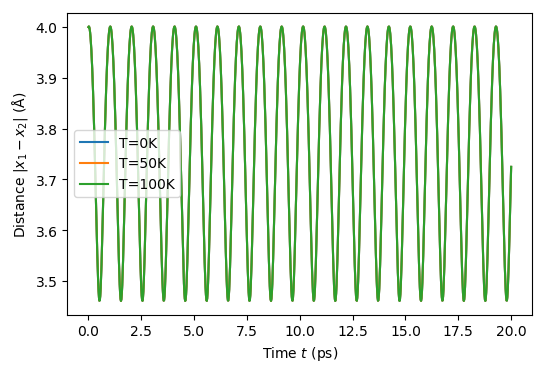

The average distance by T=0K is 3.7633192294629136 Å
The average distance by T=50K is 3.763319229462898 Å
The average distance by T=100K is 3.763319229462916 Å


In [122]:
T1 = 0 # in (K)
T2 = 50 # in (K)
T3 = 100 # in (K)
v_rms1 = numpy.sqrt(T1/m_O) # in (K.ps.Å^-1.u^-1) ?
v_rms2 = numpy.sqrt(T2/m_O) # in (K.ps.Å^-1.u^-1) ?
v_rms3 = numpy.sqrt(T3/m_O) # in (K.ps.Å^-1.u^-1) ?
t = numpy.linspace(0,20,1001) # in (ps)

# Initial conditions
IC1 = numpy.asarray([[-2, v_rms1],[2, v_rms1]])
IC2 = numpy.asarray([[-2, v_rms2],[2, v_rms2]])
IC3 = numpy.asarray([[-2, v_rms3],[2, v_rms3]])

pos1 = Leapfrog_Solver(IC1, time_array=t)
pos2 = Leapfrog_Solver(IC2, time_array=t)
pos3 = Leapfrog_Solver(IC3, time_array=t)

Graph1 = mpl.figure(dpi=100)
mpl.plot(t,abs(pos1[0][0][:-1]-pos1[0][1][:-1]),label='T=0K')
mpl.plot(t,abs(pos2[0][0][:-1]-pos2[0][1][:-1]),label='T=50K')
mpl.plot(t,abs(pos3[0][0][:-1]-pos3[0][1][:-1]),label='T=100K')
mpl.xlabel('Time $t$ (ps)')
mpl.ylabel('Distance $|x_1-x_2|$ (Å)')
mpl.legend(loc='best')
mpl.show()

# The mean of the distance
d1 = abs(pos1[0][0][:-1]-pos1[0][1][:-1]).mean()
d2 = abs(pos2[0][0][:-1]-pos2[0][1][:-1]).mean()
d3 = abs(pos3[0][0][:-1]-pos3[0][1][:-1]).mean()
print('The average distance by T=0K is',d1,'Å')
print('The average distance by T=50K is',d2,'Å')
print('The average distance by T=100K is',d3,'Å')

If the initial velocities have an opposite direction, the average distance will be positive correlated to the temperature of the system, which have been already calculated in previous sections. The reason is rather simple: higher temperature, higher root-mean-squared velocities.